In [353]:
import matplotlib.pyplot as plt
import numpy as np

# Line drawing algorithm

In [354]:
def draw_line(x1, y1, x2, y2):
    
    is_steep = abs(y2 - y1) > abs(x2 - x1)
    
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
        
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    p = 2 * dy - dx
    
    x_values = []
    y_values = []
    x = x1
    y = y1
    
    while True:
        if is_steep:
            x_values.append(y)
            y_values.append(x)
        else:
            x_values.append(x)
            y_values.append(y)
        
        if x == x2 and y == y2:
            break
            
        if p < 0:
            p += 2 * dy
        else:
            y += sy
            p += 2 * dy - 2 * dx
        
        x += sx
        
    return x_values, y_values

# Circle drawing algorithm

In [355]:
def eight_way_symmetric_plot(cx, cy, x, y):
    points = []
    points.append((x + cx, y + cy))
    points.append((x + cx, -y + cy))
    points.append((-x + cx, -y + cy))
    points.append((-x + cx, y + cy))
    
    points.append((y + cx, x + cy))
    points.append((y + cx, -x + cy))
    points.append((-y + cx, -x + cy))
    points.append((-y + cx, x + cy))
    
    pointX, pointY = zip(*points)
    
    pointX = list(pointX)
    pointY = list(pointY)
    
    return pointX, pointY


def circle_drawing(cx, cy, r):
    
    x = 0
    y = r 
    d = 3 - 2 * r
    
    x_values = []
    y_values = []
    
    pointX, pointY = eight_way_symmetric_plot(cx, cy, x, y)
    
    x_values.append(pointX)
    y_values.append(pointY)
    
    while x <= y:
        
        print(f"d : {d}")
        
        if d < 0:
            d += 4 * x + 6
        else:
            d += 4 * (x - y) + 10
            y -= 1
        
        x += 1
        pointX, pointY = eight_way_symmetric_plot(cx, cy, x, y)
        
        x_values.append(pointX)
        y_values.append(pointY)
        
    
    return x_values, y_values

# Values to be added

In [356]:
values = []

# Baseline

In [357]:
# baseline
values.append(draw_line(-30, -22, 30, -22)) # Top baseline
values.append(draw_line(-20, -30, 20, -30)) # ground baseline

values.append(draw_line(-24, -24, 24, -24))

values.append(draw_line(-30, -22, -24, -24))
values.append(draw_line(-24, -24, -20, -30))

values.append(draw_line(30, -22, 24, -24))
values.append(draw_line(24, -24, 20, -30))

# Left side

In [358]:
values.append(draw_line(-26, 0, -26, -22))
values.append(draw_line(-20, 0, -20, -22))
values.append(draw_line(-26, 0, -20, 0))

# Right side

In [359]:
values.append(draw_line(20, 0, 20, -22))
values.append(draw_line(26, 0, 26, -22))
values.append(draw_line(20, 0, 26, 0))

# Circle

In [360]:
circleX, circleY = circle_drawing(0, 0, 10)

d : -17
d : -11
d : -1
d : 13
d : -5
d : 17
d : 11
d : 13


# Middle

In [361]:
values.append(draw_line(-10, 14, -10, -22))
values.append(draw_line(0, -10, 0, -22))
values.append(draw_line(10, 14, 10, -22))
values.append(draw_line(0, 14, 0, 10))

values.append(draw_line(-10, 14, -4, 22))
values.append(draw_line(6, 22, 0, 14))
values.append(draw_line(20, 22, 10, 14))

values.append(draw_line(-4, 22, 20, 22))

# Unpacking

In [362]:
x_values, y_values = zip(*values)
x_values = [item for sublist in x_values for item in (sublist + [None])]
y_values = [item for sublist in y_values for item in (sublist + [None])]

# Drawing

In [363]:
def plot_func():
    plt.plot(x_values, y_values, color = 'black')
    plt.plot(circleX, circleY, color = 'red')
    plt.title("Practice")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.grid(True)

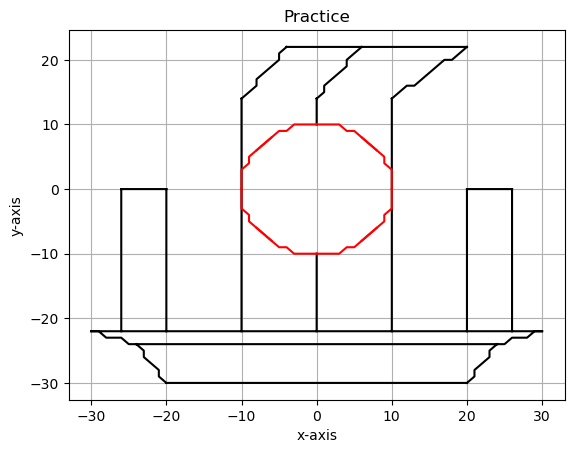

In [364]:
plot_func()